# Project Overview

### Books Sales Trend 

This project aims to study book data, including the number of reviews and the books that is listed as a bestseller, to uncover key trends such as the most in-demand genres and the factors that attract readers and increase a book’s popularity. This analysis is expected to provide valuable insights that can help publishers and authors enhance their marketing strategies and boost the success of their books. 

#### The analysis will focus on understanding:

- How do ratings and the number of reviews vary among bestsellers?
- Are certain authors more likely to have their books become bestsellers?
- What visual design patterns are consistently associated with bestseller book covers?
- What genres are most represented among bestsellers?
- What is the relationship between price and bestseller books? , What is the price range of bestseller books?


This project is expected to contribute valuable insights to the publishing industry and help stakeholders make data-driven decisions.

---
We will answer now each question by providing an evidence from our data 

### 1 - How do ratings and the number of reviews vary among bestsellers?


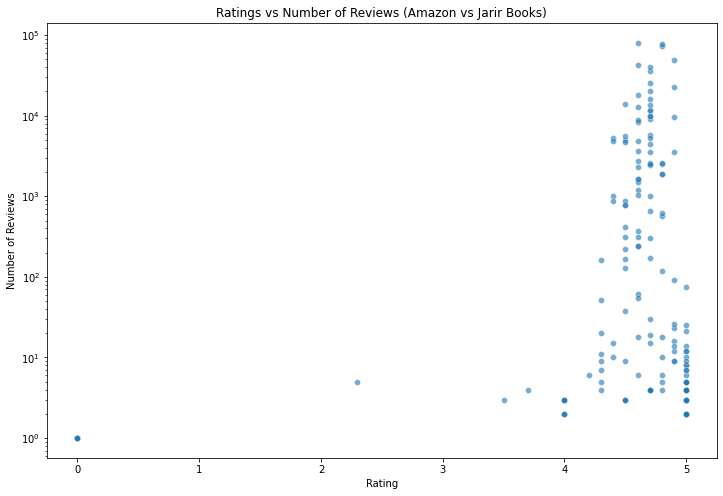

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("prior_processed_Integrated.csv")

df_adjusted = df.copy()
df_adjusted["Num Of Reviews Adjusted"] = df_adjusted["Num Of Reviews"] + 1

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_adjusted, x="Rating", y="Num Of Reviews Adjusted", alpha=0.6, palette={"Amazon": "blue", "Jarir": "red"})

# Set log scale for y-axis
plt.yscale("log")

# Labels and title
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Ratings vs Number of Reviews (Amazon vs Jarir Books)")

plt.show()

- The scatter plot reveals no strong correlation between book ratings and the number of reviews. While most books fall within the 4-5 rating range, their review counts vary significantly, with some highly rated books receiving very few reviews while others accumulate thousands. 
- The spread of review counts is inconsistent, suggesting that high ratings do not necessarily translate into more reviews.
- Lower-rated books (below 4 stars) receive almost no reviews, reinforcing the trend that books with more visibility and popularity tend to accumulate higher engagement, while lesser-known ones struggle for attention.

---

### 2 - Are certain authors more likely to have their books become bestsellers?

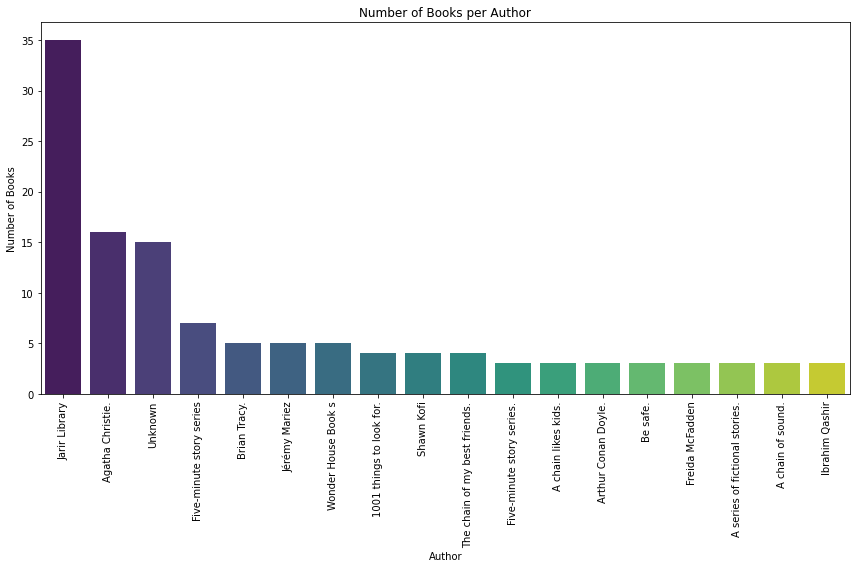

In [30]:
df = pd.read_csv("prior_processed_Integrated.csv")

# Count the number of books per author
books_per_author = df['Author'].value_counts()

# Filter authors with more than 1 book 
books_per_author = books_per_author[books_per_author > 2]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=books_per_author.index, y=books_per_author.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Number of Books per Author')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

- The graph highlights that bestsellers are significantly influenced by authors, as many of them have multiple books appearing in the dataset. This trend suggests that well-known authors often sustain a strong presence in the bestseller list due to their established reputation and consistent readership, which is consistent with the multivariate analysis showing that authors with multiple bestsellers tend to maintain strong sales across their books . 
- Notably, jarir Library (35 books) and Agatha Christie (16 books) have the highest number of bestsellers, demonstrating that authors with a larger body of work tend to have greater representation among bestsellers. 
- Other notable authors with multiple bestsellers include “Brain Tracy” (5 books), “Ibrahim Qashir” (4 books), and “Arthur Conan Doyle” (4 books). The pattern suggests that once an author gains popularity, their subsequent books are more likely to achieve bestseller rankings. 

This reinforces the idea that readers often gravitate toward familiar authors, leading to sustained book sales and rankings.

--- 

### 3 - What visual design patterns are consistently associated with bestseller book covers?

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np 

In this section, we apply clustering techniques to explore design patterns in book covers using visual features such as contrast, sharpness, edge complexity, and color properties.

We aim to:
1. Test different values for k using the Silhouette Score Method to find the optimal number of clusters.
2. Apply an additional clustering algorithm ( Spectral Clustering ) to compare our results .
3. Choose the best clustering result based on visual separation and interpretability.

In [32]:
df = pd.read_csv("processed_data_extra.csv")

# Select visual features only
visual_features = ['Contrast', 'Edge_Complexity', 'Color_Saturation', 'Color_Variance', 'Sharpness']
X = df[visual_features].dropna()

In [33]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

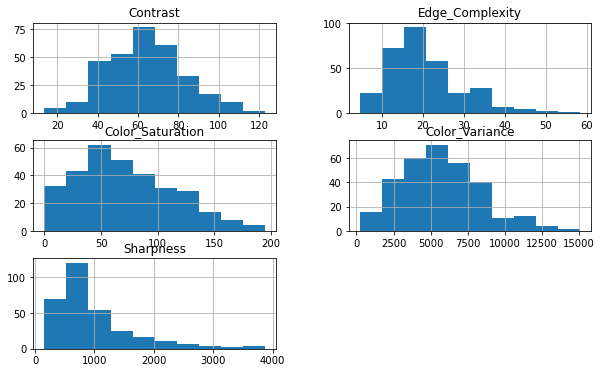

In [34]:
X.hist(figsize=(10, 6))
plt.show()

To visualize our selected features and check their distribution

#### Testing k-values using Silhouette Score method 

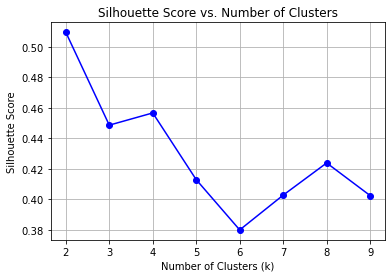

Optimal k: 2


In [35]:
from sklearn.datasets import make_blobs

# Range of k values to test
k_values = range(2, 10)
silhouette_scores = []

# Calculate Silhouette Score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot results
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Find optimal k (highest score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal k: {optimal_k}")

In [36]:
# Apply KMeans with chosen k ( 2 ) 
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

In [37]:
from sklearn.cluster import SpectralClustering  

spectral = SpectralClustering(  
    n_clusters=2,            
    affinity='nearest_neighbors',  
    random_state=42  
)  
df['Spectral_Cluster'] = spectral.fit_predict(X_scaled)  

In [38]:
# Silhouette Score for KMeans and Spectral clustering
kmeans_score = silhouette_score(X_scaled, df['KMeans_Cluster'])
print(f"KMeans Silhouette Score: {kmeans_score:.2f}")
Spectral_score = silhouette_score(X_scaled, df['Spectral_Cluster'])  
print(f"Silhouette Score: {Spectral_score}")  

KMeans Silhouette Score: 0.25
Silhouette Score: 0.2224000014376724


#### K_Means visualization 

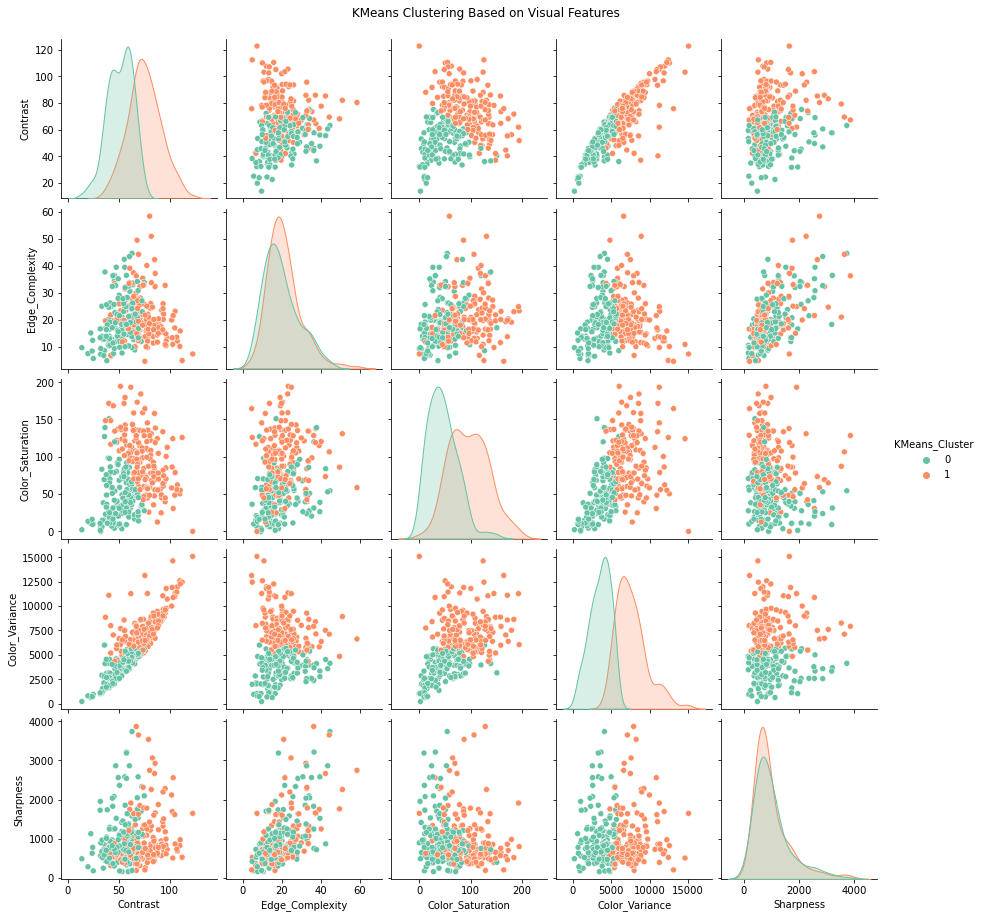

In [39]:
# Visualize clusters using pairplot
sns.pairplot(df, hue='KMeans_Cluster', vars=visual_features, palette='Set2')
plt.suptitle("KMeans Clustering Based on Visual Features", y=1.02)
plt.show()

#### Spectral clustering visualization

C:\Users\rikhm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rikhm\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


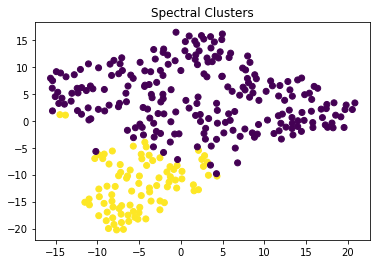

In [40]:
from sklearn.manifold import TSNE  
X_tsne = TSNE(n_components=2).fit_transform(X_scaled)  
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['Spectral_Cluster'], cmap='viridis')  
plt.title("Spectral Clusters")  
plt.show()  

#### Evaluating both models 

In [41]:
cluster_summary = df.groupby('KMeans_Cluster')[['Contrast', 'Color_Saturation', 'Edge_Complexity', 'Sharpness']].mean()
print(cluster_summary)

                 Contrast  Color_Saturation  Edge_Complexity    Sharpness
KMeans_Cluster                                                           
0               51.171365         45.551718        19.502947  1012.543540
1               75.244404         96.298877        21.103816   992.479534


- **Cluster 1** : High contrast, high color saturation, and sharp edges

- **Cluster 0** : Moderate features, less visually striking.

In [42]:
cluster_summary = df.groupby('Spectral_Cluster')[['Contrast', 'Color_Saturation', 'Edge_Complexity', 'Sharpness']].mean()
print(cluster_summary)

                   Contrast  Color_Saturation  Edge_Complexity    Sharpness
Spectral_Cluster                                                           
0                 70.451811         85.840221        22.557761  1094.403325
1                 46.299971         36.199944        14.606352   763.990492


- **Cluster 0** : High contrast, high color saturation, and less sharper edges.

- **Cluster 1** : Lower contrast, muted colors, simpler edges.

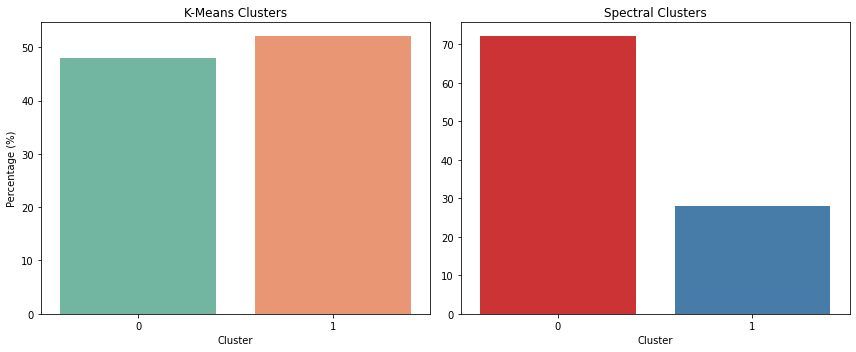

K-Means Distribution:
1    0.52
0    0.48
Name: KMeans_Cluster, dtype: float64

Spectral Clustering Distribution:
0    0.72
1    0.28
Name: Spectral_Cluster, dtype: float64


In [43]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# K-Means Distribution
kmeans_dist = df['KMeans_Cluster'].value_counts(normalize=True).reset_index()
kmeans_dist.columns = ['Cluster', 'Percentage']
kmeans_dist['Percentage'] = kmeans_dist['Percentage'] * 100
sns.barplot(x='Cluster', y='Percentage', data=kmeans_dist, palette='Set2', ax=ax[0])
ax[0].set_title('K-Means Clusters')
ax[0].set_ylabel('Percentage (%)')

# Spectral Clustering Distribution
spectral_dist = df['Spectral_Cluster'].value_counts(normalize=True).reset_index()
spectral_dist.columns = ['Cluster', 'Percentage']
spectral_dist['Percentage'] = spectral_dist['Percentage'] * 100
sns.barplot(x='Cluster', y='Percentage', data=spectral_dist, palette='Set1', ax=ax[1])
ax[1].set_title('Spectral Clusters')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("K-Means Distribution:")
print(df['KMeans_Cluster'].value_counts(normalize=True).round(2))
print("\nSpectral Clustering Distribution:")
print(df['Spectral_Cluster'].value_counts(normalize=True).round(2))

---
 **Results Summary:**

| Algorithm | Silhouette Score |
|-----------|------------------|
| K-Means    | **0.25**          |
| Spectral Clustering    | **0.22**        | 

---


so now back to our question **" What visual design patterns are consistently associated with bestseller book covers ? "**

we applied unsupervised clustering using two algorithms—K-Means and Spectral Clustering—on image-based features (contrast, color saturation, sharpness, etc.) of bestseller book covers. The goal was to discover natural groupings in cover design styles and understand which patterns are most common.

Both clustering methods revealed two main groups of cover designs:

- **Cluster 1 (K-Means) / Cluster 0 (Spectral):** Covers with high contrast, vibrant color saturation, and either sharp or soft edges.

- **Cluster 0 (K-Means) / Cluster 1 (Spectral):** Covers with more subtle color use, lower contrast, and simpler designs.

Although the exact grouping of covers differed slightly between methods, both algorithms supported the same general finding:

> Bold, high-impact visuals (around 50% of covers) are more dominant among bestsellers, while subtler designs make up the remaining 50%.

Based on the silhouette score and cluster visualization, Both models were good but we selected **K-Means** as the better clustering algorithm.

- Works best for spherical, evenly sized clusters .
- Easier to understand since Spectral Clustering uses math tricks (eigenvalues)
- Neither method made great clusters (scores are low), But K-Means was less bad and easier to act on.

Finally , this clustering analysis suggests that visual boldness—through contrast and color—is a key pattern among bestsellers. Designers can leverage this insight when crafting new covers.

---
### 4 - What genres are most represented among bestsellers?

<Figure size 864x432 with 0 Axes>

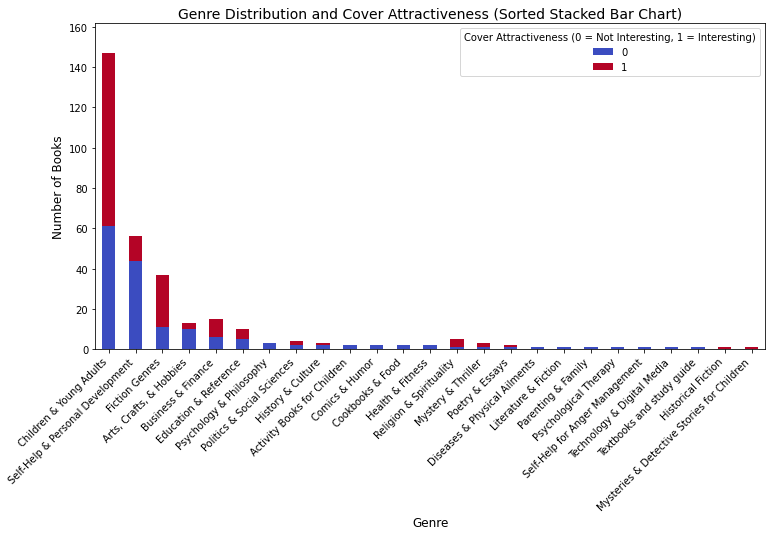

In [44]:
df = pd.read_csv("prior_processed_Integrated.csv")
genre_cover_counts = df.groupby(['Genre', 'Interesting']).size().unstack(fill_value=0)

# Sort genres by total book count (highest to lowest)
sorted_genre_cover_counts = genre_cover_counts.sort_values(by=[0, 1], ascending=False)

# Create the improved stacked bar chart
plt.figure(figsize=(12, 6))
sorted_genre_cover_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")

# Labels and title
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Books", fontsize=12)
plt.title("Genre Distribution and Cover Attractiveness (Sorted Stacked Bar Chart)", fontsize=14)
plt.legend(title="Cover Attractiveness (0 = Not Interesting, 1 = Interesting)")
plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.ylim(0, max(sorted_genre_cover_counts.sum(axis=1)) * 1.1)  # Scale y-axis to fit smallest bars

# Show the plot
plt.show()

- Self-Help & Personal Development, Children & Young Adults, and Fiction have the highest number of books, with most having attractive covers (red bars). This confirms that cover design plays a crucial role in engaging readers in high-demand genres, which is consistent with the multivariate analysis, showing that cover attractiveness helps drive engagement in these genres.

- Psychology & Philosophy, Diseases & Physical Ailments, and Psychological Therapy have a significant number of books with less attractive covers (blue bars), indicating that these genres rely more on content credibility and academic authority rather than visual appeal. The multivariate analysis confirmed that this does not affect their success, as books in these categories still performed well despite having unattractive covers.

- Despite having fewer total books, genres such as Mystery & Thriller, Religion & Spiritality, have a high proportion of visually appealing covers. This indicates that publishers in these categories still prioritize strong cover design to make their books stand out in a competitive market.

The combination of high-interest covers (red) across diverse genres confirms that engaging visuals are widely used to attract readers, while specific knowledge-based or academic genres show less emphasis on visual appeal. The multivariate analysis reinforces this, proving that in some genres, content depth and expertise are more critical than visual design.

- **Self-Help & Personal Development**, **Children & Young Adults**, and **Fiction** have the highest number of books among the bestsellers. Most books in these genres also tend to have attractive covers ( red bars), suggesting that in popular genres, strong visual appeal plays a key role in engaging readers. This is consistent with the multivariate analysis, which showed that attractive covers contribute to higher engagement in these categories.

- **Psychology & Philosophy**, **Diseases & Physical Ailments**, and **Psychological Therapy** also have a significant presence, but many books in these genres feature less visually appealing covers ( blue bars ). Despite this, they still perform well, indicating that in knowledge-driven fields, success relies more on content credibility and academic authority rather than cover design.

Overall, while attractive covers are a strong strategy across many genres, especially high-demand ones, some fields depend more on the depth and credibility of their content, as supported by the multivariate analysis.

--- 
### 5 - What is the relationship between price and bestseller books? , What is the price range of bestseller books?

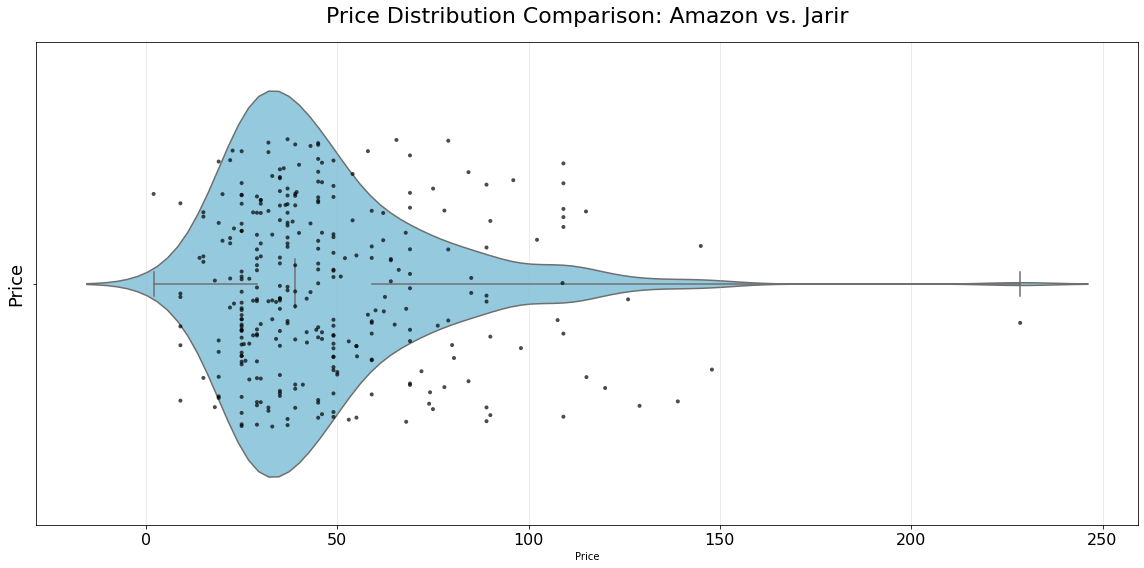

In [45]:
df = pd.read_csv("prior_processed_Integrated.csv")

plt.figure(figsize=(16, 8))

sns.violinplot( x='Price', data=df, 
              palette=['skyblue', 'lightcoral'], inner=None, scale='width')

sns.boxplot( x='Price', data=df, whis=[0, 100],
           width=0.1, palette=['skyblue', 'lightcoral'])

sns.stripplot( x='Price', data=df, color='black',
             size=4, jitter=0.3, alpha=0.7, dodge=True)

plt.title('Price Distribution Comparison: Amazon vs. Jarir', fontsize=22, pad=20)
plt.ylabel('Price', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=14)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

- **Likely Negative Correlation:** Bestseller books  appear to cluster in the lower-to-mid price ranges (20 – 100), as this range typically maximizes accessibility and sales volume.
- **Limited High-Priced Bestsellers:** Fewer bestsellers are observed at the upper price range ( more than 150 ), suggesting premium pricing may reduce mass-market appeal.
- The concentration of dots/strip plots at lower prices supports the idea that affordability drives bestseller status.

---

This study offers a data-driven look into the factors behind bestseller books, providing actionable insights for authors, publishers, and designers. By analyzing ratings, authorship, visual design, genre trends, and pricing, we identified patterns that drive success.

Our findings show that bestseller status results from a combination of factors. Popular authors benefit from loyal audiences, while bold, vibrant cover designs — marked by strong contrast and color saturation — are common among bestsellers. Genres like Children & Young Adults, Self-Help, and Fiction dominate, and books priced between 20–100 perform better due to greater affordability.

Overall, strategic choices in authorship, design, genre focus, and pricing shape a book’s success. This research highlights the value of data analytics in understanding consumer behavior and optimizing publishing strategies.

Ultimately, this research supports the value of data analytics in understanding consumer = behavior and enhancing the visibility and impact of published works.